# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.20 which is incompatible.


In [2]:
# for the long running session...
from workspace_utils import active_session

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [3]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(f'brain_name: {brain_name}')
print(f'brain: {brain}')

brain_name: TennisBrain
brain: Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24


In [6]:
print('The state for the first agent looks like:\n', states[0])

The state for the first agent looks like:
 [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


In [7]:
print('The state for the second agent looks like:\n', states[1])

The state for the second agent looks like:
 [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.4669857  -1.5         0.          0.
 -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [8]:
random_action_run = True
verbose = True
num_runs = 1

if random_action_run:
    for i in range(num_runs):                                  # play game for num_runs episodes
        env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        while True:
            actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            
            if verbose:
                print(f'run:{i}, len(actions): {len(actions)}')
                
            
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            
            if verbose & ~np.all(rewards == np.array([0.0, 0.0])):
                print(f'run:{i}, rewards earned: {rewards}')
            
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            
            if verbose & ~np.all(scores == np.array([0.0, 0.0])):
                print(f'run:{i}, scores earned: {scores}')
            
            states = next_states                               # roll over states to next time step
            
            if np.any(dones):                                  # exit loop if episode finished
                break
        
        print('Total score (taking the maximum from either agents) this episode: {}'.format(np.max(scores)))

run:0, len(actions): 2
run:0, len(actions): 2
run:0, len(actions): 2
run:0, len(actions): 2
run:0, len(actions): 2
run:0, len(actions): 2
run:0, len(actions): 2
run:0, len(actions): 2
run:0, len(actions): 2
run:0, len(actions): 2
run:0, len(actions): 2
run:0, len(actions): 2
run:0, len(actions): 2
run:0, len(actions): 2
run:0, rewards earned: [0.0, -0.009999999776482582]
run:0, scores earned: [ 0.   -0.01]
Total score (taking the maximum from either agents) this episode: 0.0


In [9]:
# Number of agents: 2
# Size of each action: 2
if random_action_run:
    print(actions)

[[ 0.39060515  1.        ]
 [-0.37844167  1.        ]]


In [10]:
# Number of agents: 2
if random_action_run:
    print(states)

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.         -7.43639946 -1.5        -0.          0.
   6.69487906  5.99607611 -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.         -7.73019552 -1.5         0.          0.
  -6.69487906  5.99607611  0.          0.        ]]


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

### DDPG agent

In [11]:
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent_v2 import Agent, GAMMA

In [12]:
GAMMA

0.99

In [13]:
agent_testing = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=1)
agent_testing.reset()
agent_testing

In [14]:
#examine the agent
print(f'agent.state_size: {agent_testing.state_size}')
print(f'agent.action_size: {agent_testing.action_size}')
print(f'agent.seed: {agent_testing.seed}')
print(f'agent.actor_local: {agent_testing.actor_local}')
print(f'agent.actor_target: {agent_testing.actor_target}')
print(f'agent.critic_local: {agent_testing.critic_local}')
print(f'agent.critic_target: {agent_testing.critic_target}')
print(f'agent.actor_optimizer: {agent_testing.actor_optimizer}')
print(f'agent.critic_optimizer: {agent_testing.critic_optimizer}')

agent.state_size: 24
agent.action_size: 2
agent.seed: None
agent.actor_local: Actor(
  (fc1): Linear(in_features=24, out_features=400, bias=True)
  (bn1): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (bn2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=300, out_features=2, bias=True)
)
agent.actor_target: Actor(
  (fc1): Linear(in_features=24, out_features=400, bias=True)
  (bn1): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (bn2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=300, out_features=2, bias=True)
)
agent.critic_local: Critic(
  (fcs1): Linear(in_features=24, out_features=400, bias=True)
  (bn1): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, trac

In [15]:
# testing
env_info = env.reset(train_mode=True)[brain_name]       # reset environment
states = env_info.vector_observations                   # get current state for each agent      
scores = np.zeros(num_agents)                           # initialize score for each agent
agent_testing.reset()
max_t = 1000

for t in range(max_t):
    actions = agent_testing.act(states, add_noise=True)         # select an action
    env_info = env.step(actions)[brain_name]            # send all actions to the environment
    next_states = env_info.vector_observations          # get next state (for each agent)
    rewards = env_info.rewards                          # get reward (for each agent)
    dones = env_info.local_done                         # see if episode finished
    
    if ~np.all(rewards == np.array([0.0, 0.0])):
        agent_testing.step(states, actions, rewards, next_states, dones)

    scores += env_info.rewards                          # update the score (for each agent)
    states = next_states                                # roll over states to next time step
    
    if t % 1 == 0:
        print('\rTimestep {}\tScore: {:.2f}'.format(t, np.mean(scores)), end="")

    if np.any(dones):                                   
        break

Timestep 13	Score: -0.00

In [16]:
# testing
len(agent_testing.memory)

2

In [17]:
#testing
agent_testing.memory.memory[0]

Experience(state=array([ -1.08997898e+01,  -1.85216200e+00,  -9.53674316e-06,
         0.00000000e+00,   6.69487906e+00,  -2.65006781e-01,
        -9.53674316e-06,   0.00000000e+00,  -1.07646160e+01,
        -1.85216200e+00,   1.35176134e+00,   0.00000000e+00,
         6.69487906e+00,  -1.18462682e+00,   1.35176134e+00,
         0.00000000e+00,  -1.09011545e+01,  -1.85216200e+00,
        -0.00000000e+00,   0.00000000e+00,   6.69487906e+00,
        -2.10424662e+00,  -0.00000000e+00,   0.00000000e+00]), action=array([-0.04874446, -0.16750646], dtype=float32), reward=0.0, next_state=array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -6.59263992, -1.5       , -0.        ,  0.        ,
        6.55063343,  6.        , -0.        ,  0.        ]), done=True)

In [18]:
# testing
dones

[True, True]

In [19]:
# testing
rewards

[0.0, -0.009999999776482582]

In [20]:
BATCH_SIZE = 256  # Required number of positive experiences 

def ddpg(agent, 
         n_episodes=10000, 
         max_t=1000, 
         print_every=100, 
         pos_exp_threshold=1e-3, 
         neg_exp_threshold=-1e-3):
    
    current_max_score = -np.inf  # it's good to track if the model hits the new record as being trained
    scores_raw = []
    scores_max = []
    scores_window = deque(maxlen=100)
    mean_scores_window = []
    pos_experience_count = 0  # until we have the required number (BATCH_SIZE) of positive experience, we wait
    
    # For each episode, reset the env and do...
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        agent.reset()

        exp_collection = [] # Experience collection for this specific episode. Hold off the learning yet
        
        for t in range(max_t):
            
            # Select an action (for each agent)
            if pos_experience_count > BATCH_SIZE:
                actions = agent.act(states, add_noise=True)          # select an action
                actions = np.clip(actions, -1, 1)                    # all actions between -1 and 1
            else:
                actions = np.random.randn(num_agents, action_size)   # select a random action
                actions = np.clip(actions, -1, 1)                    # all actions between -1 and 1            
            
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            
            exp_collection.append((states, actions, rewards, next_states, dones))
            scores += rewards                                  # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
            
        # Learn from the Experience collection
        for i, score in enumerate(scores):
            if score > pos_exp_threshold:   
                pos_experience_count += 1
                for experience in exp_collection:
                    states, actions, rewards, next_states, dones = experience
                    agent.memory.add(states[i], actions[i], score, next_states[i], dones[i])
            
            elif score < neg_exp_threshold: 
                for experience in exp_collection:
                    states, actions, rewards, next_states, dones = experience
                    agent.memory.add(states[i], actions[i], score, next_states[i], dones[i])

            # Learn, if enough samples are available in memory
            if len(agent.memory) > BATCH_SIZE:
                experiences = agent.memory.sample()
                agent.learn(experiences, GAMMA)

        scores_raw.append(scores)                                   # append this episode's scores
        scores_max.append(np.max(scores))                           # append max(this episode's scores). This will keep all the max(scores)
        scores_window.append(np.max(scores))                         # append max(this episode's scores). This will keep the last 100 max(scores)
        mean_scores_window.append(np.mean(scores_window))            # append the deque average (over 100 episodes)
        current_max_score = max(np.max(scores), current_max_score)  # update the max_score if this episode hit the new record
        
        
        if i_episode % print_every == 0:
            print('An average score (over 100 episodes) at episode #{:4d}: {:.4f}, max {:.4f}'\
                  .format(i_episode, np.mean(scores_window), current_max_score))  # over the last 100 expisodes, show the avg and current max
         
        if np.mean(scores_window) > 0.50:
            print('An average (over 100 episodes) of score of +0.50 achieved at episode #{:4d}, {:.4f}'\
                  .format(i_episode, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')  
            break
    
    return scores_raw, scores_max, scores_window, mean_scores_window, agent

In [21]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=1)

with active_session():
    scores_raw, scores_max, scores_window, mean_scores_window, agent = \
        ddpg(agent, n_episodes=10000, print_every=100)

An average score (over 100 episodes) at episode # 100: 0.0208, max 0.1000
An average score (over 100 episodes) at episode # 200: 0.0185, max 0.1000
An average score (over 100 episodes) at episode # 300: 0.0250, max 0.1000
An average score (over 100 episodes) at episode # 400: 0.0212, max 0.1900
An average score (over 100 episodes) at episode # 500: 0.0163, max 0.1900
An average score (over 100 episodes) at episode # 600: 0.0105, max 0.1900
An average score (over 100 episodes) at episode # 700: 0.0165, max 0.1900
An average score (over 100 episodes) at episode # 800: 0.0195, max 0.1900
An average score (over 100 episodes) at episode # 900: 0.0206, max 0.2000
An average score (over 100 episodes) at episode #1000: 0.0185, max 0.2000
An average score (over 100 episodes) at episode #1100: 0.0137, max 0.2000
An average score (over 100 episodes) at episode #1200: 0.0163, max 0.2000
An average score (over 100 episodes) at episode #1300: 0.0599, max 0.2000
An average score (over 100 episodes) a

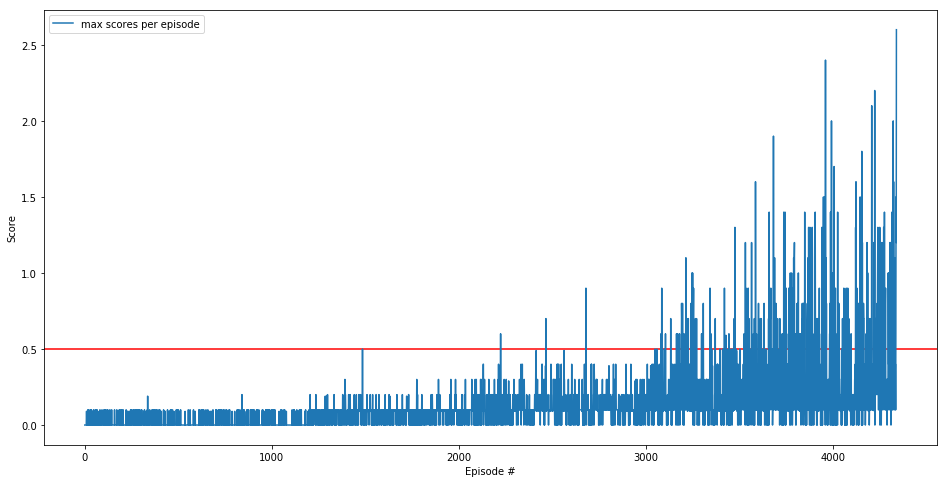

In [23]:
# max scores per episode
target_score = 0.5
plt.figure(figsize=(16, 8))
plt.axhline(y=target_score, color='r', linestyle='-')
plt.plot(np.arange(1, len(scores_max)+1), scores_max, label='max scores per episode')
plt.legend(loc='upper left')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

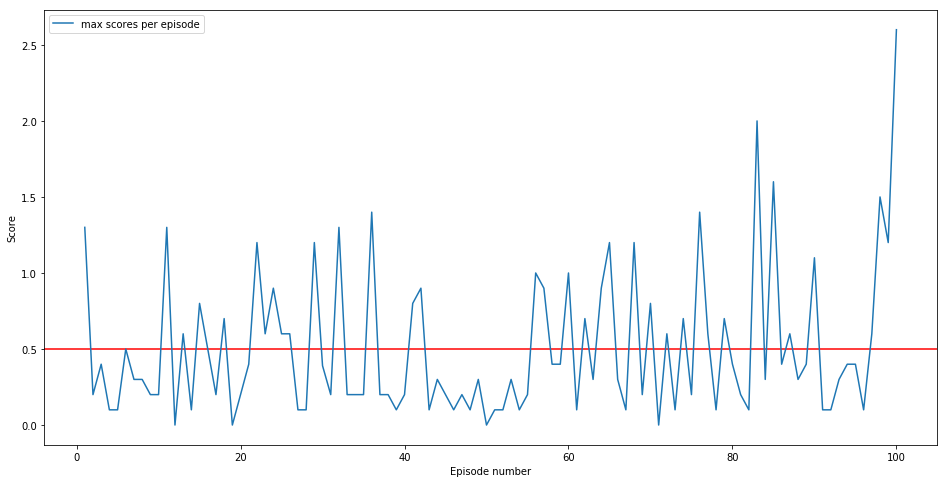

In [24]:
# last 100 episodes
# episode 100 in the x-axis actually means the last episode
# episode 99 in the x-axis actaully means the last-1 episode
# episode 98 in the x-axis actaully means the last-2 episode
# ...
# episode 0 in the x-axis actaully means the last-100 episode
target_score = 0.50
plt.figure(figsize=(16, 8))
plt.axhline(y=target_score, color='r', linestyle='-')
plt.plot(np.arange(1, len(scores_window)+1), scores_window, label='max scores per episode')
plt.legend(loc='upper left')
plt.xlabel('Episode number')
plt.ylabel('Score')
plt.show()

In [25]:
# confirm the average score (over 100 episodes) from np.mean(scores_window)
np.mean(scores_window)

0.50690000757575038

In [26]:
# The last scores
scores_raw[-1]

array([ 2.50000004,  2.60000004])

## Watch the trained agent

In [27]:
# load the agent
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

In [34]:
while True :
    actions = agent.act(states, add_noise=False)        # select an action
    env_info = env.step(actions)[brain_name]            # send all actions to the environment
    next_states = env_info.vector_observations          # get next state (for each agent)
    rewards = env_info.rewards                          # get reward (for each agent)
    dones = env_info.local_done                         # see if episode finished

    scores += env_info.rewards                          # update the score (for each agent)
    states = next_states                                # roll over states to next time step
    
    if t % 1 == 0:
        print('\rTimestep {}\tScore: {:.2f}'.format(t, np.mean(scores)), end="")

    if np.any(dones):                                   
        break

Timestep 999	Score: 2.65

In [35]:
dones

[True, True]

In [36]:
scores

array([ 2.70000004,  2.59000004])

When finished, you can close the environment.

In [37]:
env.close()